In [1]:
import pandas as pd
import numpy as np
import os

In [9]:
import matplotlib.pyplot as plt

Best lr:0.01
Best p:0.9
Best wd:0.001
best quick auroc: 0.663
best med auroc: 0.642
best long auroc: 0.62


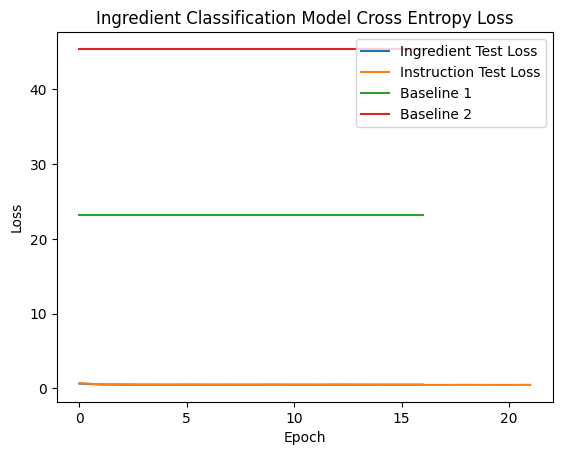

In [14]:
#USE TO FIND BEST CLASSIFICATION MODEL PERFORMANCE HYPERPARAMETER SETTINGS
best_val_loss = float('inf')
best_lr = -1
best_p = -1
best_wd = -1
for lr in ([1e-1,1e-2,1e-3]):
    for p in [0.8,0.9]:
        for wd in [1e-1,1e-2,1e-3]:
            params = f"b64_lr{lr}_p{p}_wd{wd}"
            try:
                df = pd.read_csv(f'results_mlp_ingre_bucket/{params}/loss_log.csv')
            except:
                continue
            df.set_index('Epoch',inplace=True)
            best_epoch = df['Val Loss'].argmin()
            cur_best_val_loss = df.loc[best_epoch,'Val Loss']
            if cur_best_val_loss < best_val_loss:
                best_val_loss = cur_best_val_loss
                test_df = pd.read_csv(f'results_mlp_ingre_bucket/{params}/test_aurocs.csv')
                test_df.set_index('Epoch',inplace=True)
                quick,med,long = test_df.loc[best_epoch]
                best_lr = lr
                best_p = p
                best_wd = wd
print(f"Best lr:{best_lr}")
print(f"Best p:{best_p}")
print(f"Best wd:{best_wd}")
print(f"best quick auroc: {quick}")
print(f"best med auroc: {med}")
print(f"best long auroc: {long}")

params = f"b64_lr{lr}_p{p}_wd{wd}"
df = pd.read_csv(f'results_mlp_ingre_bucket/{params}/loss_log.csv')
test_ingre_loss = df['Test Loss']
plt.plot(test_ingre_loss,label='Ingredient Test Loss')
line1 = [23.25] * len(test_ingre_loss)

params = f"b64_lr0.001_p0.8_wd0.0001"
df2 = pd.read_csv(f'results_mlp_bucket/{params}/loss_log.csv')
test_loss = df2['Test Loss']
plt.plot(test_loss,label='Instruction Test Loss')


line2 = [45.43] * len(test_ingre_loss)

plt.plot(line1,label='Baseline 1')
plt.plot(line2,label='Baseline 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Ingredient Classification Model Cross Entropy Loss')
plt.legend()
plt.savefig('bucket_ingre_plot.png')


In [ ]:
best_train_loss = float('inf')
best_val_loss = float('inf')

for lr in ([1e-1,1e-2,1e-3]):
    for p in [0.8,0.9]:
        for wd in [1e-1,1e-2,1e-3]:
            params = f"b64_lr{lr}_p{p}_wd{wd}"
            df = pd.read_csv(f'results_mlp_ingre_bucket/{params}/loss_log.csv')

In [2]:
#USE TO FIND BEST REGRESSION INGREDIENTS MODEL
best_val_loss = float('inf')
best_val_test = float('inf')
best_lr = -1
best_p = -1
best_wd = -1
for lr in ([1e-1,1e-2,1e-3]):
    for p in [0.8,0.9]:
        for wd in [1e-1,1e-2,1e-3]:
            params = f"b64_lr{lr}_p{p}_wd{wd}"
            try:
                df = pd.read_csv(f'results_mlp_ingre_regression/{params}/loss_log.csv')
            except:
                continue
            df.set_index('Epoch',inplace=True)
            best_epoch = df['Val Loss'].argmin()
            cur_best_val_loss = df.loc[best_epoch,'Val Loss']
            if cur_best_val_loss < best_val_loss:
                best_val_loss = cur_best_val_loss
                best_test_loss = df.loc[best_epoch,'Test Loss']
                best_lr = lr
                best_p = p
                best_wd = wd
                
            
print(f"Best lr:{best_lr}")
print(f"Best p:{best_p}")
print(f"Best wd:{best_wd}")
print(f"Best test MSE: {best_test_loss}")

Best lr:0.1
Best p:0.8
Best wd:0.01
Best test MSE: 499419.62


In [3]:
#USE TO FIND BEST REGRESSION INSTRUCTION MODEL
best_val_loss = float('inf')
best_val_test = float('inf')
best_lr = -1
best_p = -1
best_wd = -1
for lr in ([1e-1,1e-2,1e-3]):
    for p in [0.8,0.9]:
        for wd in [1e-1,1e-2,1e-3]:
            params = f"b64_lr{lr}_p{p}_wd{wd}"
            try:
                df = pd.read_csv(f'results_mlp_regression/{params}/loss_log.csv')
            except:
                continue
            df.set_index('Epoch',inplace=True)
            best_epoch = df['Val Loss'].argmin()
            cur_best_val_loss = df.loc[best_epoch,'Val Loss']
            if cur_best_val_loss < best_val_loss:
                best_val_loss = cur_best_val_loss
                best_test_loss = df.loc[best_epoch,'Test Loss']
                best_lr = lr
                best_p = p
                best_wd = wd
                
            
print(f"Best lr:{best_lr}")
print(f"Best p:{best_p}")
print(f"Best wd:{best_wd}")
print(f"Best test MSE: {best_test_loss}")

Best lr:-1
Best p:-1
Best wd:-1
Best test MSE: 499419.62


In [4]:
df = pd.read_csv('useRecipesData.csv')

In [6]:
mean_prep_time = df['PrepTime'].mean()

In [9]:
df['baselineMSE'] = df['PrepTime'].apply(lambda x: (x - mean_prep_time)**2)

In [11]:
df['baselineMSE'].mean()

335838.92794319

In [1]:
#BASELINE 1
# ALWAYS PREDICT <15 class
import torch
from sklearn import metrics
from tqdm.auto import tqdm

criterion = torch.nn.BCELoss()

def _get_metrics(loader):
        y_true, y_score = [], []
        correct, total = 0, 0
        running_loss = []
        max_iterations = 50
        iteration = 0
        for X, y in loader:
            y = y.float()
            y_true.append(y)
            naive = [[1,0,0] for x in range(len(y))]
            naive = np.array(naive,dtype=np.float32)
            naive = torch.tensor(naive)
            y_score.append(naive)
            running_loss.append(criterion(naive, y))
        y_true = torch.cat(y_true)
        y_score = torch.cat(y_score)
        measure = metrics.roc_auc_score(y_true.cpu(), y_score.cpu(),average=None)
        loss = np.mean(running_loss)
        return np.round(measure, decimals=3), round(loss,2)

In [2]:
from dataset_bucketing import *
# from dataset_ingre_bucket import *
_,_,te_loader  = get_train_val_test_loaders(64)
measure,loss = _get_metrics(te_loader)



Baseline 1 quick AUROC [0.5 0.5 0.5]


NameError: name 'quick' is not defined

In [3]:
print(f"Baseline 1 quick AUROC {measure[0]}")
print(f"Baseline 1 med AUROC {measure[1]}")
print(f"Baseline 1 long AUROC {measure[2]}")
print(f"Baseline 1 loss {loss}")

Baseline 1 quick AUROC 0.5
Baseline 1 med AUROC 0.5
Baseline 1 long AUROC 0.5
Baseline 1 loss 23.25


In [6]:
#BASELINE 2
# Randomly predict class
import torch
from sklearn import metrics
import random
from tqdm.auto import tqdm
bag = [[1,0,0],[0,1,0],[0,0,1]]
def _get_metrics2(loader):
        y_true, y_score = [], []
        correct, total = 0, 0
        running_loss = []
        max_iterations = 50
        iteration = 0
        for X, y in tqdm(loader):
            y = y.float()
            y_true.append(y)
            naive = [random.choice(bag) for x in range(len(y))]
            naive = np.array(naive, dtype=np.float32)
            naive = torch.tensor(naive)
            y_score.append(naive)
            running_loss.append(criterion(naive, y))
        y_true = torch.cat(y_true)
        y_score = torch.cat(y_score)
        measure = metrics.roc_auc_score(y_true.cpu(), y_score.cpu(),average=None)
        loss = np.mean(running_loss)
        return np.round(measure, decimals=3), round(loss,2)

In [7]:
#from dataset_bucketing import *
from dataset_ingre_bucket import *
_,_,te_loader  = get_train_val_test_loaders(64)
measure,loss = _get_metrics2(te_loader)
print(f"Baseline 1 quick AUROC {measure[0]}")
print(f"Baseline 1 med AUROC {measure[1]}")
print(f"Baseline 1 long AUROC {measure[2]}")
print(f"Baseline 1 loss {loss}")

  0%|          | 0/24 [00:00<?, ?it/s]

Baseline 1 quick AUROC 0.488
Baseline 1 med AUROC 0.514
Baseline 1 long AUROC 0.501
Baseline 1 loss 45.439998626708984
